# Ornstein Uhlenbeck Instanton Calculation 

In this notebook we will use the MAM method outlined in [1] to calculate an instanton in the Ornstein Uhlenbeck SDE model. We will compare this to the analytic solution as well as the numerically integrated Euler-Lagrange Equations.

- [1] Weinan, E., Ren, W. and Vanden-Eijnden, E., 2004. Minimum action method for the study of rare events. Communications on pure and applied mathematics, 57(5), pp.637-656.

In [1]:
# Standard Package imports

import numpy as np
import numpy.linalg as la
import numpy.random as rm
import matplotlib.pyplot as plt

from mam import Mam_alg

from tqdm.notebook import tqdm

In [ ]:
def _action(self, path):
    """ Takes a path and computes the FW action along the path when ndim >1. If ndim=1,
    object will use _1d_action.

    Path input is of form necesseary for scipy.minimise (see parameter explanation).
    Finite differences are used to approximate derivatives.
    Trapezoidal Rule used to compute integral

    Parameters
    ----------
    path: np array
        shape is flat (time * ndim) for use by scipy.minimise
        method reshapes into (time, ndim)
    """
    h = path.reshape(self._user_shape)                     
    v = self._b(0, h, self.b_args) - np.vstack(np.gradient(h, self.time.flatten(), 1)[0]) 

    # Dot product calulcation
    v2 = [] 
    for x in v:
        v2.append(x.dot(self.d @ x.T))
    return 0.5 * np.trapz(v2, x=self.time)

In [ ]:
def _1d_action(self, path):
    """
    Same as _action method for 1d case.
    """
    h = path.reshape(self._user_shape)                     
    v = self._b(0, h, self.b_args) - np.vstack(np.gradient(h, self.time.flatten()))
    integrand =  v**2
    return 0.5 * np.trapz(integrand, x=self.time)

## Model Definition

The SDE is defined via 

$dx = -\gamma x dt  + \sigma dWt$

# F-W Action Minimisation

In [2]:
# F-W action Definition

def a(t, x, s):
    gamma, sigma = s
    return - gamma * x

In [3]:
def analytic_solution(time, x0, xf, s):
    gamma, sigma = s
    t0 = time[0]
    tf = time[-1]
    c1 = (xf - x0 * np.exp(- gamma * tf))/(2 * np.sinh(gamma * tf))
    c2 = x0 - c1
    return c1 * np.exp(gamma * time) + c2 * np.exp(-gamma * time)

In [4]:
# Parameter Specification

# OU Parameters
gamma = 0.5
sigma = 0.25
s = [gamma, sigma]
D = sigma **2
Dinv = 1/D

# Time
t0 = 0
tF = 10
dt = 0.1
steps = int((tF-t0)/dt)
time = np.arange(t0, tF, dt)

In [5]:
# Instanton Initialisation

initial_point = 0.1
final_point = 1.1

inst_ic = np.linspace(initial_point, final_point, len(time))

In [ ]:


# bnds = np.zeros((*inst_ic.shape, 2)) # indexed by Time, ndim, lower/upper

# if (len(inst_ic.shape) == 1):
#     shape = 1
# else:
#     shape = np.ones(inst_ic.shape[1])

# # t = 0 Constraint
# bnds[0,...,0] = initial_point - 0.01 * shape # Lower
# bnds[0,...,1] = initial_point + 0.01 * shape # Upper

# # Bounds for t \in (dt, T-dt)
# bnds[1:-1, ..., 0] = - 10
# bnds[1:-1, ..., 1] = 10

# # t = T Constraint
# bnds[-1,...,0] = final_point - 0.01 * shape
# bnds[-1,...,1] = final_point + 0.01 * shape

In [ ]:
# # We initialise by creating an np array indexed by Time, ndim, lower/upper bound
# # User specified bnds are of this form
# self._bnds = np.zeros((*self._user_shape, 2))
# initial_point = self.ic[0]
# final_point = self.ic[-1]

# # Check if we have 1d case
# if (len(self._user_shape) == 1):
#     shape = 1
# else:
#     shape = np.ones(self._user_shape[1])


# # t = 0 Constraint
# self._bnds[0,:,0] = initial_point - 0.01 * shape # Lower bound
# self._bnds[0,:,1] = initial_point + 0.01 * shape # Upper bound

# # Bounds for t \in (dt, T-dt)
# self._bnds[1:-1, :, 0] = - 10 # 10 chosen as arbitrary default
# self._bnds[1:-1, :, 1] = 10 # Important that this is changed for specific problem 

# # t = T Constraint
# self._bnds[-1,:,0] = final_point - 0.01 * shape
# self._bnds[-1,:,1] = final_point + 0.01 * shape

# # We then reshape to the form used by the object
# self._bnds = self._bnds.reshape(len(self.ic.flatten()), 2)

In [ ]:
# d_phi_dt calculation. Second time arg in np.gradient should be irrelevant.
if (len(self._user_shape) == 1):
    grad = np.vstack(np.gradient(h, self.time.flatten()))
else:
    grad = np.vstack(np.gradient(h, self.time.flatten(), 1)[0])

v = self._b(0, h, self.b_args) - grad  

In [ ]:
#   # We initialise by creating an np array indexed by Time, ndim, lower/upper bound
#     # User specified bnds are of this form
#     self._bnds = np.zeros((*self._user_shape, 2))
#     initial_point = self.ic[0]
#     final_point = self.ic[-1]

#     # t = 0 Constraint
#     self._bnds[0,:,0] = initial_point - 0.01 * np.ones(self._user_shape[1]) # Lower bound
#     self._bnds[0,:,1] = initial_point + 0.01 * np.ones(self._user_shape[1]) # Upper bound

#     # Bounds for t \in (dt, T-dt)
#     self._bnds[1:-1, :, 0] = - 10 # 10 chosen as arbitrary default
#     self._bnds[1:-1, :, 1] = 10 # Important that this is changed for specific problem 

#     # t = T Constraint
#     self._bnds[-1,:,0] = final_point - 0.01 * np.ones(self._user_shape[1])
#     self._bnds[-1,:,1] = final_point + 0.01 * np.ones(self._user_shape[1])

#     # We then reshape to the form used by the object
#     self._bnds = self._bnds.reshape(len(self.ic.flatten()), 2)

In [6]:
options={'maxls': 10, 'maxiter': 10000, 'maxfun': 10000}

In [ ]:
test._1d_action(test.ic).shape

In [ ]:
v

In [ ]:
np.gradient(test.ic, test.time)

In [ ]:
path = test.ic
h = path.reshape(self._user_shape)    
v=np.gradient(h, self.time) -  self._b(0, h, self.b_args)
integrand =  v**2
0.5 * np.trapz(integrand, x=self.time)

In [ ]:
np.gradient(h, test.time)

In [ ]:
h = path.reshape(test._user_shape)    
v = np.gradient(h, test.time) -  test._b(0, h, test.b_args)
integrand =  v**2
0.5 * np.trapz(integrand, x=test.time)

In [7]:
test = Mam_alg(a, s, inst_ic, time, Dinv)
result = test.run(options)

I've created default bounds, but you should probably set some.
b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'


In [ ]:
np.gradient(test.ic, test.time.flatten())

In [ ]:
np.gradient(test.ic, test.time.flatten(), 1)

In [ ]:
test.b_args

In [ ]:
result = test.run(options)

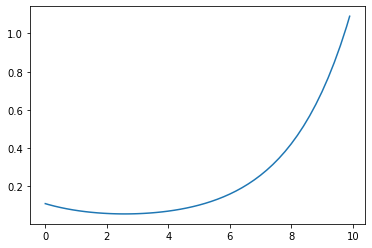

In [8]:
plt.plot(time, test.instanton)

## Minimisation

In [ ]:
# Bounds on action arguments

def bounds(steps, initial_point, final_point):
    bnds = np.zeros((steps, 2))
    bnds[0]= [initial_point-0.1, initial_point]
    bnds[1:-1, 0] = initial_point-0.1 # when this is 0, something funny in the solution
    bnds[1:-1, 1] = final_point+0.1
    bnds[-1]= [final_point, final_point+0.1]
    return bnds

bnds = bounds(steps, initial_point, final_point)

In [ ]:
ls_max = 10 # max number of linesearch steps
it_max = 1000000 # max number of iterations

In [ ]:
res = minimize(action, inst_ic, method='L-BFGS-B', bounds = bnds, 
               options={'maxls': ls_max, 'maxiter': it_max, 'maxfun': it_max})
print(res.message)

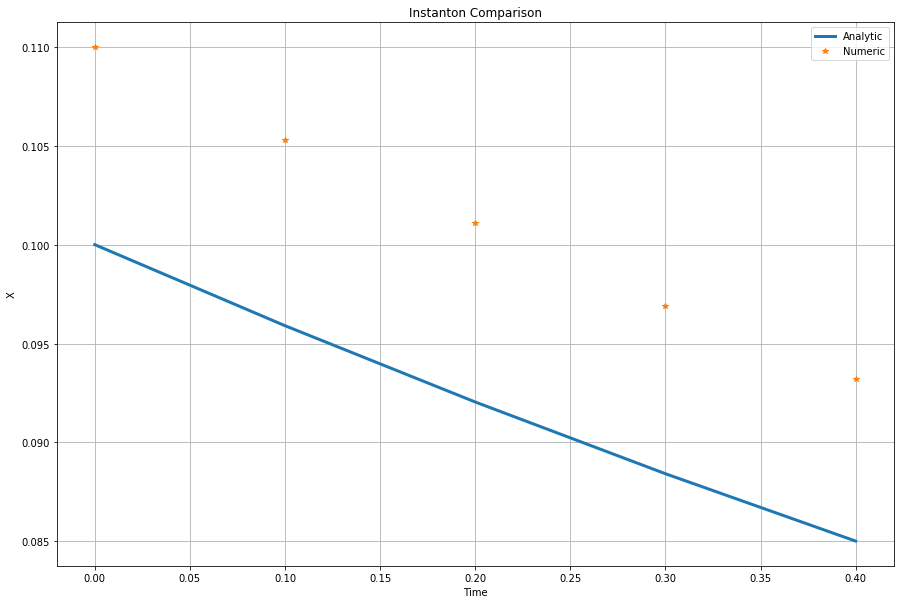

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(time[:5], analytic_solution(time, initial_point, final_point, s)[:5],linewidth=3,label='Analytic')
ax.plot(time[:5], test.instanton[:5],'*',label='Numeric')
ax.grid()
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_title('Instanton Comparison')
fig.show()